# Tests estadísticos

## Test de normalidad

Los test de normalidad son una serie de técnicas estadísticas que se utilizan para determinar si una muestra de datos se ajusta a una distribución normal. Existen varios test de normalidad, entre los más comunes se encuentran:
  * Test de Shapiro-Wilk
  * Test de Kolmogorov-Smirnov
  * Test de Lilliefors
  * Test de Anderson-Darling

Los test usan la siguiente prueba de hipótesis:
  * Hipótesis nula (H0): La muestra de datos proviene de una distribución normal.
  * Hipótesis alternativa (H1): La muestra de datos no proviene de una distribución normal.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
diabetes = pd.read_csv('../data/Diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Realizamos una prueba de normalidad para la variable 'Glucose' utilizando el test de Shapiro-Wilk.

In [6]:
stats.shapiro(diabetes['Glucose'])

ShapiroResult(statistic=0.9701038379391942, pvalue=1.9863474999979633e-11)

In [7]:
stats.shapiro(diabetes['Glucose'])[1] < 0.05

True

Realizamos el test de lilliefors para la variable 'Glucose'.

In [8]:
from statsmodels.stats.diagnostic import lilliefors

In [9]:
# Perform the Lilliefors test
statistic, p_value = lilliefors(diabetes['Glucose'])

print(f'Statistic: {statistic}')
print(f'p-value: {p_value}')

Statistic: 0.06399847607594411
p-value: 0.0009999999999998899


## Test para dos variables numéricas

Para comparar dos variables numéricas se pueden utilizar los siguientes test:
  * Test de correlación de Pearson: Este test mide la fuerza de la relación lineal entre dos variables continuas y normales.
  * Test de correlación de Spearman: Este test mide la fuerza de la relación entre dos variables continuas, sin asumir que la relación es lineal.
  * Test de correlación de Kendall: Este test mide la fuerza de la relación entre dos variables continuas, sin asumir que la relación es lineal.
  * Test de correlación de Point-Biserial: Este test mide la relación entre una variable continua y una variable dicotómica.
  * Test de correlación de Biserial: Este test mide la relación entre una variable continua y una variable dicotómica.
  * Test de correlación de Tau de Kendall: Este test mide la relación entre dos variables ordinales.
  * Test de correlación de Tau de Somers: Este test mide la relación entre dos variables ordinales.
  * Test de correlación de Tau de Goodman y Kruskal: Este test mide la relación entre dos variables ordinales.

La prueba de hipótesis de un test de correlación se utiliza para determinar si existe una relación significativa entre dos variables. Aquí están las hipótesis para un test de correlación:  

Hipótesis nula (H0): No existe una relación significativa entre las dos variables. En términos de correlación, esto significa que la correlación es igual a 0.

Hipótesis alternativa (H1): Existe una relación significativa entre las dos variables. En términos de correlación, esto significa que la correlación es diferente de 0.

Para realizar la prueba de hipótesis, se calcula un valor p a partir de los datos. Si el valor p es menor que el nivel de significancia (generalmente 0.05), entonces se rechaza la hipótesis nula y se concluye que existe una relación significativa entre las dos variables. Si el valor p es mayor que el nivel de significancia, entonces no se puede rechazar la hipótesis nula y se concluye que no existe una relación significativa entre las dos variables.

La forma matemática de la correlación de Pearson es la siguiente:

$$r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}$$

La forma matemática de la correlación de Spearman es la siguiente:

$$r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

Para calcular estos test se debe primero hallar la matriz de correlación. Para ello se puede utilizar el método `corr` de pandas. Luego se puede utilizar el método `corr` de scipy para calcular el test de correlación.

Donde $d_i$ es la diferencia entre los rangos de las dos variables para la i-ésima observación y n es el número de observaciones.

In [10]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

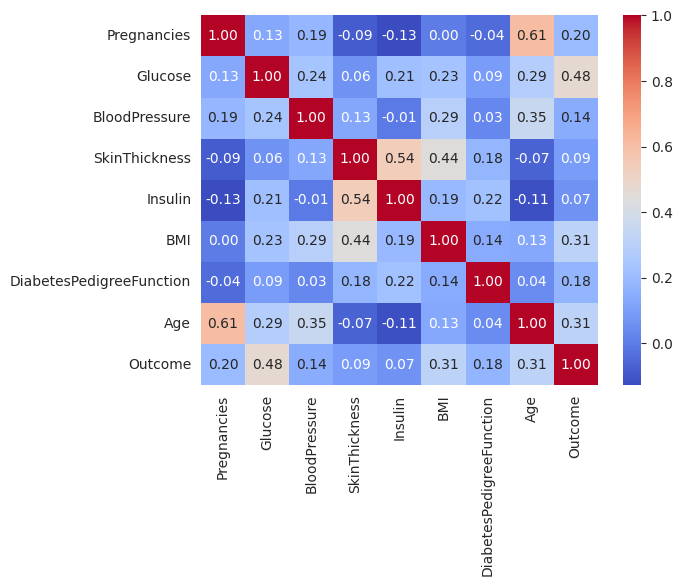

In [12]:
sns.heatmap(diabetes.corr('spearman'), annot=True, cmap='coolwarm', fmt='.2f' )

In [13]:
stats.spearmanr(diabetes['Glucose'], diabetes['Outcome'])

SignificanceResult(statistic=0.4757763064583268, pvalue=1.2305781575825131e-44)

<Axes: xlabel='Outcome', ylabel='Glucose'>

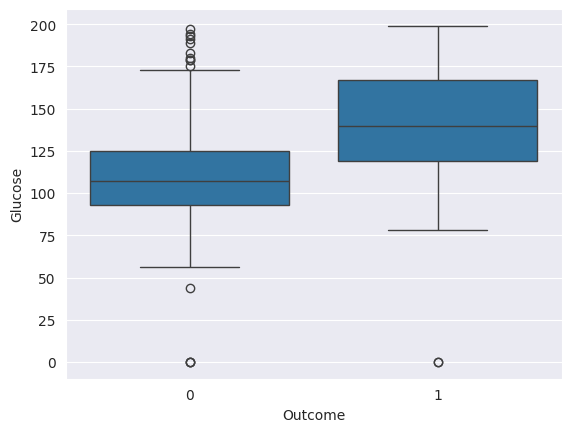

In [14]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes)